In [1]:
import pandas as pd
import numpy as np
import scipy.stats as si

# SECURITY MARKET LINE

In [2]:
RF = 0.07 # Riskless rate

In [3]:
# Asset A
mean1 = 0.1 # Exp Return
vol1 = 0.1 # Std Deviation
varia1 = vol1**2 # Variance

In [4]:
# Asset B
mean2 = 0.15 # Exp Return
vol2 = 0.2 # Std Deviation
varia2 = vol2**2 # Variance

In [5]:
Corr = 0.2 # Correlation
cov = vol1*vol2*Corr # Covariance

In [6]:
M_Weight_A = 0.564102564017103 # % in Asset A for the Market Portfolio (M)
print("The % in Asset A is:", "{:.2%}".format(M_Weight_A))

The % in Asset A is: 56.41%


## Market Portfolio (M)

In [7]:
M_Weight_B = 1-M_Weight_A # % in Asset B for the Market Portfolio (M)
print("The % in Asset B is:", "{:.2%}".format(M_Weight_B))
M_mean = M_Weight_A*mean1+M_Weight_B*mean2 # Exp return, M
print("The Market Portfolio Exp return is:", "{:.2%}".format(M_mean))
M_vol = np.sqrt((M_Weight_A*vol1)**2+(M_Weight_B*vol2)**2+2*(M_Weight_A*M_Weight_B)*cov) # Volatility, M
print("The Market Portfolio Volatility is:", "{:.2%}".format(M_vol))
ERP = M_mean-RF
print("The Market Portfolio excess return is:", "{:.2%}".format(ERP))

The % in Asset B is: 43.59%
The Market Portfolio Exp return is: 12.18%
The Market Portfolio Volatility is: 11.29%
The Market Portfolio excess return is: 5.18%


In [8]:
# Market portfolio maximizes Sharpe ratio
Sharpe_ratio = ERP/M_vol
print("The Market portfolio maximizes Sharpe ratio is:", round((Sharpe_ratio),2))

The Market portfolio maximizes Sharpe ratio is: 0.46


# Portfolio X

In [9]:
# Portfolio X
X_mean = 0.16 # Exp Return
X_vol = 0.2 # Volatility (Std Dev)
Beta = 1.5
w = 0.03 # Tracking Error
T = 5 # Years of observations

# PERFORMANCE MEASURES

In [10]:
Treynor = (X_mean-RF)/Beta
print("The Treynor measure of Portfolio X is:", round((Treynor),3))

The Treynor measure of Portfolio X is: 0.06


In [11]:
Sharpe = (X_mean-RF)/X_vol  # Sharpe ratio
print("The Sharpe ratio of Portfolio X is:", round((Sharpe),3))

The Sharpe ratio of Portfolio X is: 0.45


In [12]:
Jensen = (X_mean-RF)-(ERP*Beta) # Jensen alpha
print("The Jensen alpha of Portfolio X is:", round((Jensen),3))

The Jensen alpha of Portfolio X is: 0.012


In [13]:
IR = Jensen/w # Information ratio
print("The Information ratio of Portfolio X is:", round((IR),3))

The Information ratio of Portfolio X is: 0.41


In [14]:
t_s = IR*np.sqrt(T) # t statistic
print("The t statistic of Portfolio X is:", round((t_s),3))

The t statistic of Portfolio X is: 0.917


# Selected Portfolios (Note they are all on the SML)

In [15]:
Weight_A = [1.5, 1.0, 0.5, 0.0, -0.5, -1.0]
Weight_A

[1.5, 1.0, 0.5, 0.0, -0.5, -1.0]

In [16]:
Weight_B = []
for i in range(0,len(Weight_A)):
    Weight_B.append(1-Weight_A[i])
Weight_B    

[-0.5, 0.0, 0.5, 1.0, 1.5, 2.0]

In [17]:
COVA = []
for i in range(0,len(Weight_A)):
    COVA.append(Weight_A[i]*M_Weight_A*varia1+Weight_B[i]*M_Weight_B*varia2+(Weight_A[i]*M_Weight_B+Weight_B[i]*M_Weight_A)*cov)
COVA    

[0.001230769228461783,
 0.00738461538410262,
 0.013538461539743456,
 0.019692307695384294,
 0.02584615385102513,
 0.03200000000666597]

In [18]:
BETA = []
for i in range(0,len(Weight_A)):
    BETA.append(COVA[i]/M_vol**2)
BETA    

[0.09653465326843508,
 0.5792079206562919,
 1.0618811880441488,
 1.5445544554320056,
 2.027227722819862,
 2.509900990207719]

In [19]:
SML = []
for i in range(0,len(Weight_A)):
    SML.append(RF+BETA[i]*ERP)
SML    

[0.0749999999902135,
 0.0999999999954419,
 0.12500000000067032,
 0.15000000000589875,
 0.17500000001112712,
 0.20000000001635554]

In [20]:
Expected = []
for i in range(0,len(Weight_A)):
    Expected.append(Weight_A[i]*mean1 + Weight_B[i]*mean2)
Expected

[0.07500000000000002, 0.1, 0.125, 0.15, 0.175, 0.19999999999999998]

In [21]:
df = pd.DataFrame({"Asset A": Weight_A, "Asset B":Weight_B, "Covariance (Port, Market)":COVA, "Beta":BETA, "Expected Return (beta)": SML, "Expected return (checking)": Expected})
df

,Asset A,Asset B,"Covariance (Port, Market)",Beta,Expected Return (beta),Expected return (checking)
0,1.5,-0.5,0.001231,0.096535,0.075,0.075
1,1.0,0.0,0.007385,0.579208,0.100,0.100
2,0.5,0.5,0.013538,1.061881,0.125,0.125
3,0.0,1.0,0.019692,1.544554,0.150,0.150
4,-0.5,1.5,0.025846,2.027228,0.175,0.175
5,-1.0,2.0,0.032000,2.509901,0.200,0.200


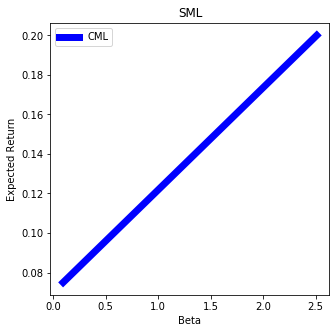

In [22]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5))
SML1 = plt.plot(df['Beta'], df['Expected Return (beta)'], label='CML', color = 'blue', linewidth = 7.0)
plt.title('SML')
plt.xlabel('Beta')
plt.ylabel('Expected Return')
plt.legend()
plt.show()